<a href="https://colab.research.google.com/github/Uma1709/Data-Science-Project-Series/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/train.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [7]:
data.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


from matplotlib import pyplot as plt
_df_0['Population -2020'].plot(kind='hist', bins=20, title='Population -2020')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Land Area (Km²)'].plot(kind='hist', bins=20, title='Land Area (Km²)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Density (P/Km²)'].plot(kind='hist', bins=20, title='Density (P/Km²)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Population -2020', y='Land Area (Km²)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Land Area (Km²)', y='Density (P/Km²)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Population -2020'].plot(kind='line', figsize=(8, 4), title='Population -2020')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Land Area (Km²)'].plot(kind='line', figsize=(8, 4), title='Land Area (Km²)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Density (P/Km²)'].plot(kind='line', figsize=(8, 4), title='Density (P/Km²)')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='sentiment', ylabel='count'>

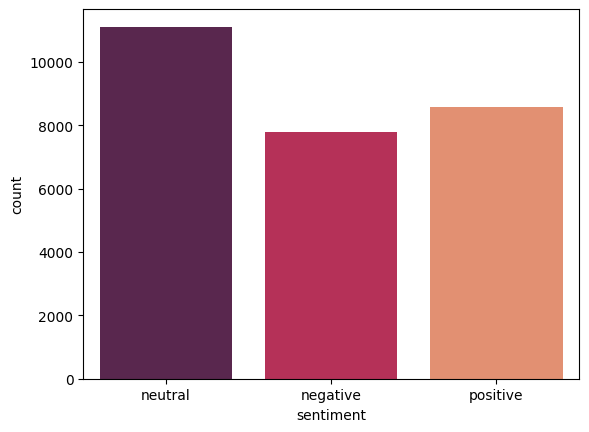

In [8]:
sns.countplot(data,x='sentiment',palette="rocket")

<Axes: xlabel='sentiment', ylabel='count'>

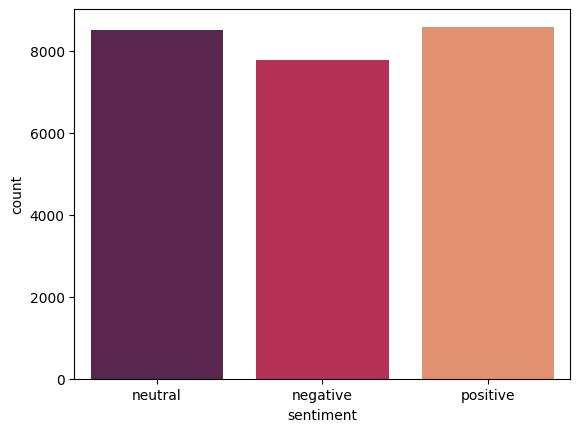

In [9]:
neutral=data[data['sentiment']=="neutral"].head(8500)
data=pd.concat([neutral, data[(data['sentiment'] == 'negative') | (data['sentiment'] == 'positive')]], axis=0)
sns.countplot(data,x='sentiment',palette="rocket")

In [10]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemming(sentence):
    splited_sen=sentence.split(' ')
    splited_stemmed_sen=[ps.stem(word) for word in splited_sen]
    stemmed_sentence = ' '.join(splited_stemmed_sen)
    return stemmed_sentence
data['text'].isna().sum()

1

In [11]:
data=data.dropna(axis=0)
data['text'].isna().sum()

0

In [12]:
stemmed_text=data['text'].apply(stemming)
stemmed_text

,text
0,"i`d have responded, if i were go"
5,http://www.dothebouncy.com/smf - some shameles...
7,soooo high
8,both of you
10,"as much as i love to be hopeful, i reckon the..."
...,...
27475,enjoy ur night
27476,wish we could come see u on denver husband l...
27477,i`v wonder about rake to. the client ha made...
27478,yay good for both of you. enjoy the break - y...


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words= 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(stemmed_text)
sequences = tokenizer.texts_to_sequences(stemmed_text)
max_sequence_length=60
X=pad_sequences(sequences, maxlen=max_sequence_length)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(data['sentiment'])
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

#model buiding


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=True,stratify=y)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Attention
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=3,verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',patience=2, verbose=1, restore_best_weights=True)
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_test, y_test),
          callbacks=[lr_scheduler, early_stopping])

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 50s 247ms/step - accuracy: 0.4263 - loss: 1.0398 - val_accuracy: 0.6805 - val_loss: 0.7332 - learning_rate: 0.0010
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 39s 253ms/step - accuracy: 0.7423 - loss: 0.6378 - val_accuracy: 0.7110 - val_loss: 0.6887 - learning_rate: 0.0010
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 43s 269ms/step - accuracy: 0.8435 - loss: 0.4270 - val_accuracy: 0.7086 - val_loss: 0.7527 - learning_rate: 0.0010
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.9101 - loss: 0.2811 - val_accuracy: 0.7002 - val_loss: 0.8683 - learning_rate: 0.0010
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.


In [15]:
y_pred=model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


<Axes: >

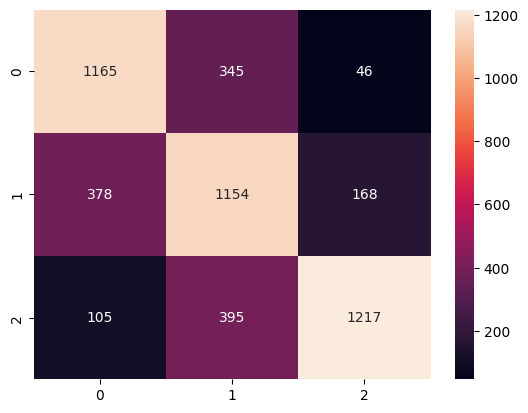

In [16]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True,fmt='d')